In [18]:
from lcg_plus.base import State
from lcg_plus.operations.symplectic import squeezing, two_mode_squeezing, beam_splitter
import numpy as np
from lcg_plus.plotting import plot_wigner_marginals
from lcg_plus.states.nongauss import prepare_fock_coherent

(<Figure size 400x400 with 4 Axes>,
 <Axes: xlabel='$x$'>,
 <Axes: ylabel='$P(x)$'>,
 <Axes: xlabel='$P(p)$', ylabel='$p$'>,
 <Axes: >)

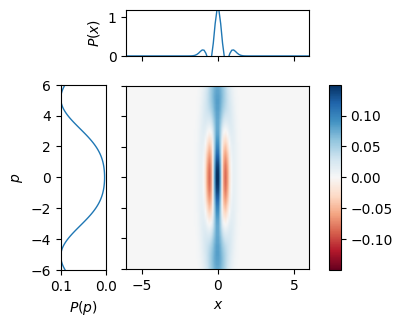

In [12]:
#Photon subtraction
state = State(2)
state.apply_symplectic_fast(squeezing(1,0), [0])
state.apply_symplectic(beam_splitter(np.arccos(np.sqrt(0.99)),0))
n = 2
state.post_select_fock_coherent(1, n)
x = np.linspace(-6,6,100)
W = state.get_wigner_log(x,x)
plot_wigner_marginals(W,x,x)



(<Figure size 400x400 with 4 Axes>,
 <Axes: xlabel='$x$'>,
 <Axes: ylabel='$P(x)$'>,
 <Axes: xlabel='$P(p)$', ylabel='$p$'>,
 <Axes: >)

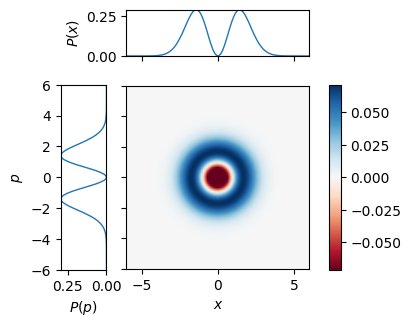

In [15]:
#Photon addition
state = State(2)
#state.apply_symplectic_fast(squeezing(1,0), [0])
state.apply_symplectic(two_mode_squeezing(1,0))

state.post_select_fock_coherent(1,1)
x = np.linspace(-6,6,100)
W = state.get_wigner_log(x,x)
plot_wigner_marginals(W.real,x,x)

0.0955631382735761


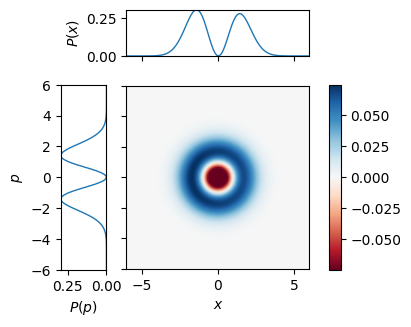

In [46]:
#Photon catalysis

state = State(1)
state.add_state(prepare_fock_coherent(1))
state.apply_symplectic(beam_splitter(np.pi/10,0))

state.post_select_fock_coherent(1,0)
x = np.linspace(-6,6,100)
W = state.get_wigner_log(x,x)
plot_wigner_marginals(W.real,x,x)
print(state.norm)

0.48735459946540327


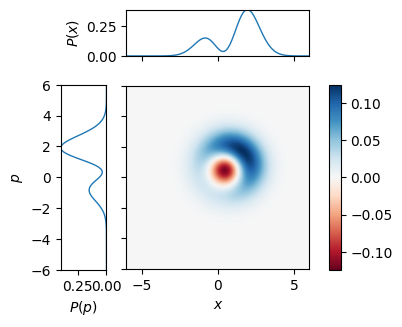

In [53]:
#Photon-added coherent state

state = State(1)
alpha = 0.5+0.5j

state.add_state(prepare_fock_coherent(1))

state.apply_displacement(np.sqrt(2*state.hbar)*np.array([alpha.real, alpha.imag,0,0]))
state.apply_symplectic(beam_splitter(np.pi/4,0))
state.post_select_fock_coherent(1,0)

x = np.linspace(-6,6,100)
W = state.get_wigner_log(x,x)
plot_wigner_marginals(W.real,x,x)
print(state.norm)